In [1]:
import numpy as np
import cv2 as cv
import os

#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage.measure import label, regionprops, regionprops_table

In [2]:
def viewImageInWindow(image, name_of_window):
    cv.namedWindow(name_of_window, cv.WINDOW_NORMAL)
    cv.imshow(name_of_window, image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

def viewImageAndCoordInNotebook(img, coords=[], bounding=[], labels=[], counts=0, subplot="test"):
    fig, ax = plt.subplots(figsize=(16,16))
    ax.imshow(img, cmap=plt.cm.gray)
    if (len(coords)!=0):
        ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=1)
    if len(bounding)!=0:
        for bound in bounding:
            rect = patches.Rectangle((bound[0][0], bound[0][1]), bound[1], bound[2], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    if (len(labels) != 0):
        for i, label in enumerate(labels):
            plt.text(bounding[i][0][0]+5, bounding[i][0][1]-5, label, size=12, color='cyan')
    if (counts != 0):
        for i in range(counts):
            plt.text(bounding[i][0][0]-5, bounding[i][0][1], i, size=12, color='yellow')          
    plt.show()
    

In [3]:
# Фильтрация и бинаризация изображений

In [4]:
# Подготовка тестовых выборок

In [5]:
def load_images_from_folder(folder): 
    images = [] 
    for filename in os.listdir(folder): # читаю все предобратанные картинки с фигурами
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv.cvtColor(img, cv.COLOR_BGR2RGB)) #
    return images

imlist = load_images_from_folder('r_imgs/') # список изображений
imlist2 = load_images_from_folder('samples/')

In [6]:
def get_fugures_by_image(img):
    threshold = filters.threshold_otsu(img)
    mask = img > threshold
    mask = morphology.remove_small_objects(mask, 10)
    mask = morphology.remove_small_holes(mask, 10)
    labels = measure.label(mask)

    fig = px.imshow(img, binary_string=True)
    fig.update_traces(hoverinfo='skip') # hover is only for label info

    figures = measure.regionprops(labels, img)
    properties = list(figures[0])
    props = measure.regionprops_table(labels, img, properties)
    
    return figures, props

----


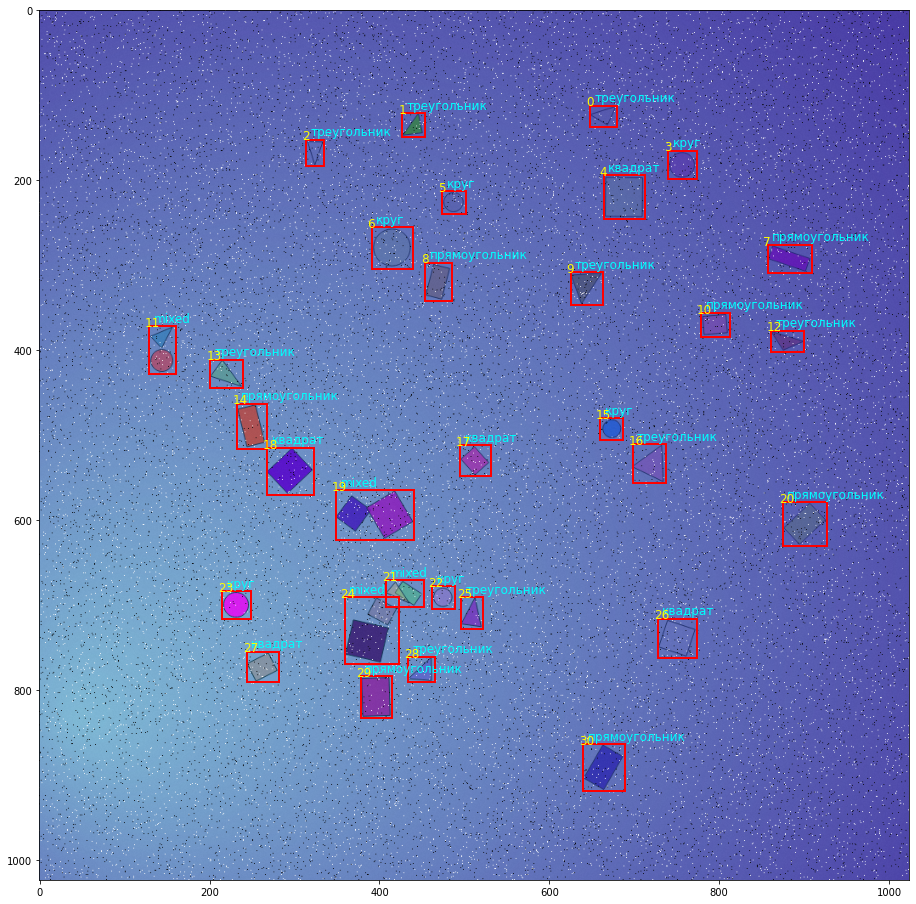

----


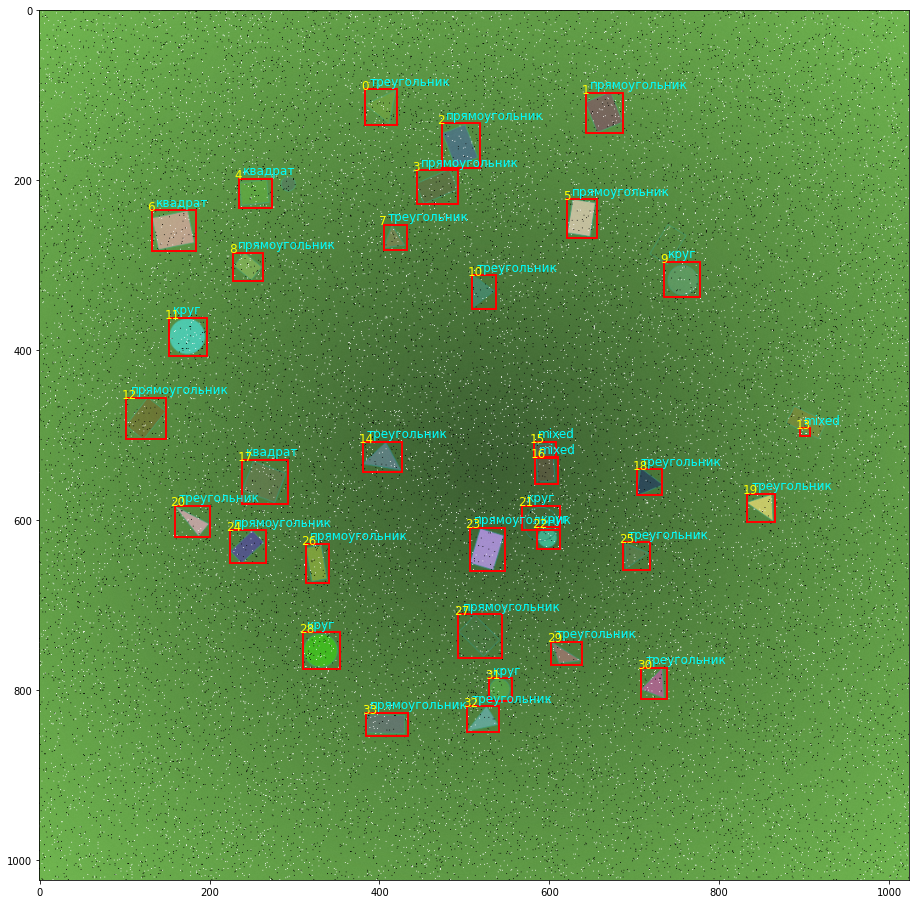

----


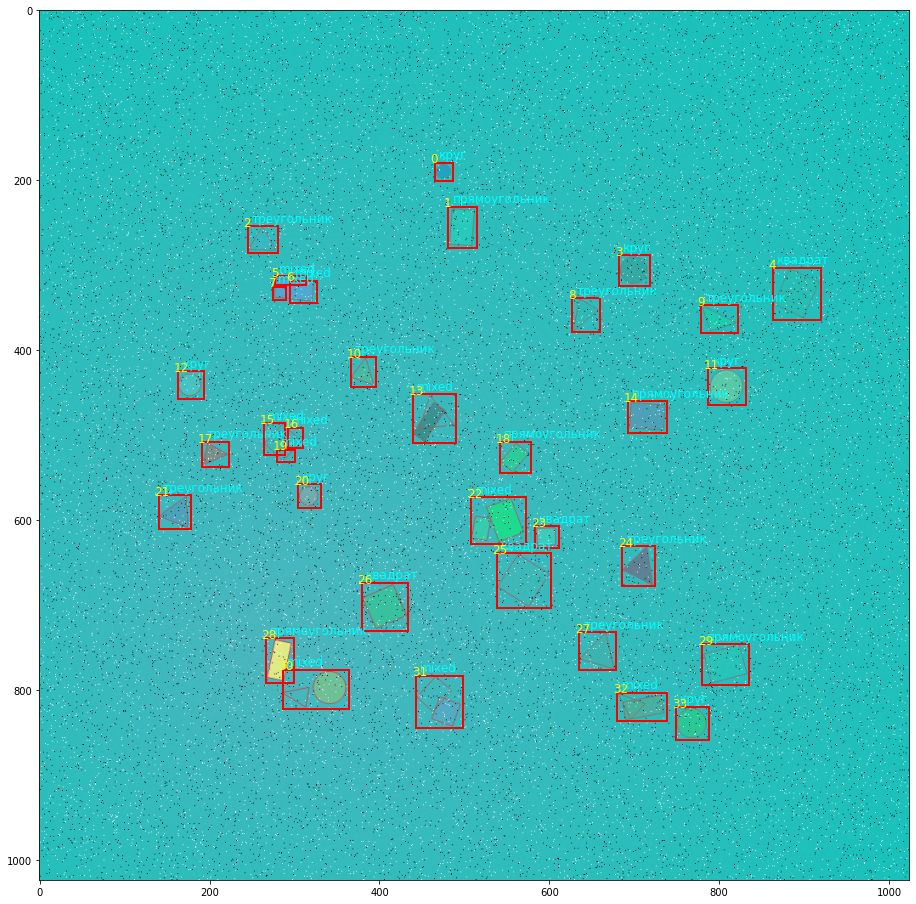

----


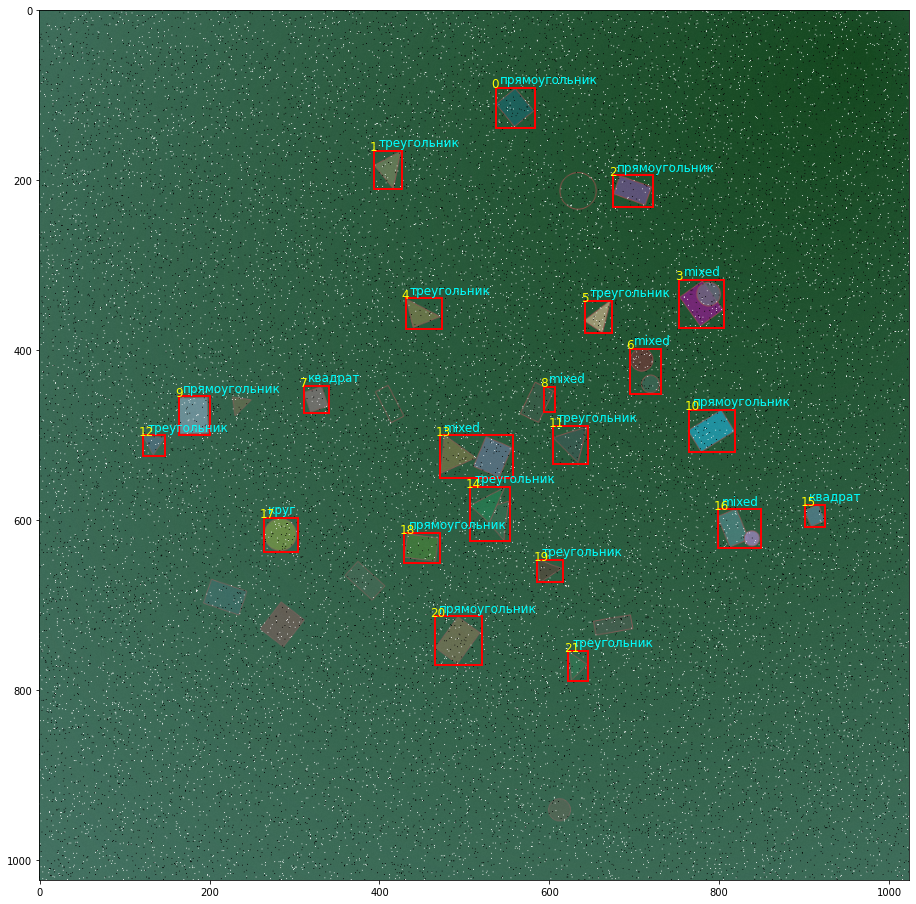

----


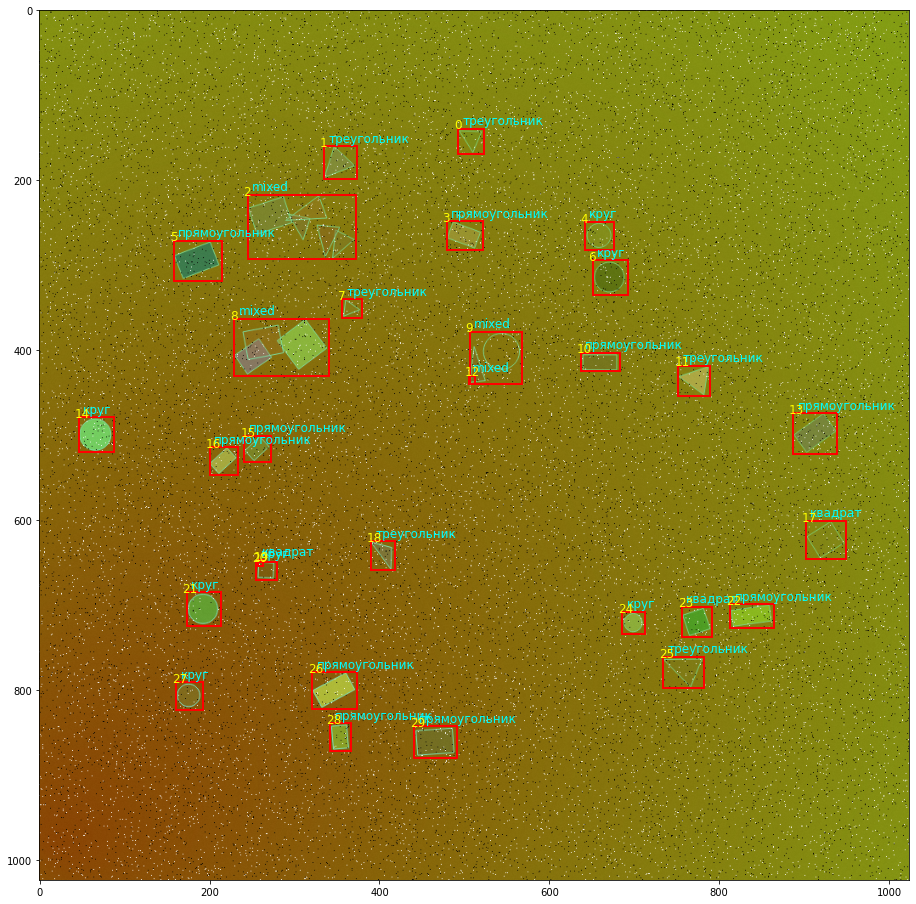

In [7]:
# пытаюсь выделить точки границы
all_coords = []
all_bounds = []
all_figures = []

f_labels = [
    ["треугольник", "треугольник", "треугольник", "круг", "квадрат", "круг", "круг", "прямоугольник", "прямоугольник", "треугольник", "прямоугольник", "mixed", "треугольник", "треугольник", "прямоугольник", "круг", "треугольник", "квадрат", "квадрат", "mixed", "прямоугольник", "mixed", "круг", "круг", "mixed", "треугольник", "квадрат", "квадрат", "треугольник", "прямоугольник", "прямоугольник"], # 1 картинка
    ["треугольник","прямоугольник","прямоугольник","прямоугольник","квадрат","прямоугольник","квадрат","треугольник","прямоугольник","круг","треугольник","круг","прямоугольник","mixed","треугольник","mixed","mixed","квадрат","треугольник","треугольник","треугольник","круг","круг","прямоугольник","прямоугольник","треугольник","прямоугольник","прямоугольник","круг","треугольник","треугольник","круг","треугольник","прямоугольник"],
    ["круг","прямоугольник","треугольник","круг","квадрат","mixed","mixed","mixed","треугольник","треугольник","треугольник","круг","круг","mixed","прямоугольник","mixed","mixed","треугольник","прямоугольник","mixed","круг","треугольник","mixed","квадрат","треугольник","квадрат","квадрат","треугольник","прямоугольник","прямоугольник","mixed","mixed","mixed","круг"],
    ["прямоугольник", "треугольник", "прямоугольник", "mixed", "треугольник", "треугольник", "mixed", "квадрат", "mixed", "прямоугольник", "прямоугольник", "треугольник", "треугольник", "mixed", "треугольник", "квадрат", "mixed", "круг", "прямоугольник", "треугольник", "прямоугольник", "треугольник"],
    ["треугольник","треугольник","mixed","прямоугольник","круг","прямоугольник","круг","треугольник","mixed","mixed","прямоугольник","треугольник","mixed","прямоугольник","круг","прямоугольник","прямоугольник","квадрат","треугольник","квадрат","круг","круг","прямоугольник","квадрат","круг","треугольник","прямоугольник","круг","прямоугольник","прямоугольник"]    
    #["circle", "square", "triangle"], # 2 картинка
]

def get_refer_coords(imlist):
    for j, img in enumerate(imlist):
        
        if j<5:
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # в серошкальный
            #ret, img = cv.threshold(img, 250 , 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)

            output = img.copy()

            figures, props = get_fugures_by_image(output)

            if len(figures)==1:
                ret, img = cv.threshold(img, 250 , 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)
                figures, props = get_fugures_by_image(img)

            img_bounds = []
            img_coords = []
            for i, figure in enumerate(figures):
                #print(i)

                #вырезанная фигура
                #viewImageAndCoordInNotebook(img, figure.coords, [[[figure.bbox[1], figure.bbox[0]], figure.bbox[3]-figure.bbox[1], figure.bbox[2]-figure.bbox[0]]])

                test = output.copy()
                test = test[figure.bbox[0]-5:figure.bbox[2]+5, figure.bbox[1]-5:figure.bbox[3]+5]
                ret, test = cv.threshold(test, 250, 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)

                img_float = np.float32(test)
                dst = cv.cornerHarris(img_float,2,3,0.04) # выделяем угловые точки
                dst = cv.dilate(dst,None)
                ret, dst = cv.threshold(dst,0.001*dst.max(),255,0)
                dst = np.uint8(dst)

                # min-distance нужно будет подогнать
                coords = corner_peaks(dst, min_distance=2, threshold_rel=0.02)

                #if len(coords)!=0:
                    #определяю угловые точки
                img_bounds.append([[figure.bbox[1], figure.bbox[0]], figure.bbox[3]-figure.bbox[1], figure.bbox[2]-figure.bbox[0]])
                img_coords.append(coords)

            all_bounds.append(img_bounds)
            all_coords.append(img_coords)
            all_figures.append(props)
            print("----")
            if j<len(f_labels):
                viewImageAndCoordInNotebook(imlist2[j], [], img_bounds, f_labels[j], len(figures))
            else:
                viewImageAndCoordInNotebook(imlist2[j], [], img_bounds, [], len(figures))
            
    return {"coords":all_coords, "bounds":all_bounds, "figures": all_figures}

# тестовая выборка
result = get_refer_coords(imlist)

In [8]:
all_figures = pd.DataFrame()

target = f_labels
for i in range(0, 4):
    item = pd.DataFrame(result["figures"][i])
    
    indexes = []
    for j in range(len(item)):
        indexes.append(i)
    item["img_index"] = indexes
    
    corner_points = []
    for k in range(len(item)):
        if (len(result["coords"][i])>k):
            corner_points.append(result["coords"][i][k])
        else:
            corner_points.append([0,0])
    item["corner_points"] = corner_points
      
    row_target = []
    for t in target[i]:
        row_target.append(t)
    item["target"] = row_target
    
    all_figures = all_figures.append(item)

all_figures.to_csv("csv/test_result.csv")
all_figures.head(100)

area  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  centroid-0  centroid-1  \
0    368     112     648     137     680        800  122.959239  665.005435   
1    327     121     427     149     453        728  137.807339  440.902141   
2    370     152     314     183     335        651  164.386486  324.354054   
3    286     165     740     199     774       1156  181.926573  756.234266   
4    966     194     664     246     713       2548  220.506211  687.073499   
..   ...     ...     ...     ...     ...        ...         ...         ...   
30   932     776     286     822     364       3588  800.549356  326.415236   
31   863     783     443     845     498       3410  815.205098  471.582851   
32   842     803     680     837     738       1972  819.142518  705.077197   
33   503     820     749     859     788       1521  838.465209  767.624254   
0    376      91     537     138     583       2162  114.138298  559.587766   

    convex_area                                       convex_image  ...  \
0           497  [[False, False, False, False, False, False, Fa...  ...   
1           458  [[False, False, False, False, False, False, Fa...  ...   
2           454  [[False, False, False, True, True, True, True,...  ...   
3           905  [[False, False, False, False, False, False, Fa...  ...   
4          2497  [[False, False, False, False, True, True, True...  ...   
..          ...                                                ...  ...   
30         2421  [[False, False, False, False, False, False, Fa...  ...   
31         2081  [[False, False, False, False, False, False, Fa...  ...   
32         1610  [[False, True, True, True, True, True, True, T...  ...   
33         1207  [[False, False, False, False, False, False, Fa...  ...   
0          1266  [[False, False, False, False, False, False, Fa...  ...   

   weighted_moments_normalized-2-1  weighted_moments_normalized-2-2  \
0                     3.941069e-06                     2.071748e-07   
1                     2.105643e-06                     3.117051e-07   
2                    -1.284894e-07                     1.419206e-07   
3                     1.619591e-07                     1.287969e-06   
4                    -1.012305e-06                     1.192752e-06   
..                             ...                              ...   
30                    9.193574e-06                     8.952246e-07   
31                    1.720414e-06                     6.469590e-07   
32                   -1.091169e-06                     4.766665e-07   
33                   -5.583756e-07                     6.706731e-07   
0                    -1.300908e-07                     1.137065e-06   

    weighted_moments_normalized-2-3  weighted_moments_normalized-3-0  \
0                      4.006820e-09                     1.869461e-06   
1                     -2.338550e-09                    -1.012563e-05   
2                      3.033734e-11                     5.628981e-06   
3                      4.801835e-10                    -1.056972e-06   
4                      1.853869e-09                    -4.012503e-06   
..                              ...                              ...   
30                     2.235272e-08                    -7.303151e-06   
31                     2.031824e-09                    -5.765936e-06   
32                     3.132360e-09                     8.698241e-07   
33                    -3.660185e-10                     1.400963e-06   
0                     -6.222525e-11                    -5.796967e-07   

    weighted_moments_normalized-3-1  weighted_moments_normalized-3-2  \
0                     -8.364816e-08                    -2.669522e-09   
1                     -3.252210e-07                     7.499220e-10   
2                      2.488864e-10                    -2.513588e-09   
3                      8.243862e-08                    -1.133240e-09   
4                      1.955688e-07                    -1.581243e-09   
..  